# Import necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore



# Load the dataset

In [2]:
df = pd.read_csv('../data/sierraleone-bumbuna.csv')


# Summary Statistics

### Display the first few rows of the dataset

In [3]:
print("Dataset Preview:")
display(df.head())

Dataset Preview:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


### Calculate summary statistics for numeric columns

In [4]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0

# Data Quality Check

### 1. Check for missing values


In [5]:
df.isnull().sum()


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

### 2. Check for negative values in columns where only positive values are expected

In [6]:
print("\nNegative Values Check:")
negative_values = df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']].lt(0).sum()
print(negative_values[negative_values > 0])


Negative Values Check:
GHI    261135
DNI    266352
DHI    263128
dtype: int64


### 3. Identify outliers using IQR (Interquartile Range) method for key columns


In [7]:
def identify_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]


### Check for outliers in sensor readings and wind speed data


In [8]:
print("\nOutliers in Sensor Readings (ModA, ModB):")
modA_outliers = identify_outliers_iqr(df['ModA'])
modB_outliers = identify_outliers_iqr(df['ModB'])
print(f"ModA Outliers: {len(modA_outliers)}")
print(f"ModB Outliers: {len(modB_outliers)}")


Outliers in Sensor Readings (ModA, ModB):
ModA Outliers: 21017
ModB Outliers: 20613


In [9]:
print("\nOutliers in Wind Speed Data (WS, WSgust):")
WS_outliers = identify_outliers_iqr(df['WS'])
WSgust_outliers = identify_outliers_iqr(df['WSgust'])
print(f"WS Outliers: {len(WS_outliers)}")
print(f"WSgust Outliers: {len(WSgust_outliers)}")



Outliers in Wind Speed Data (WS, WSgust):
WS Outliers: 3169
WSgust Outliers: 3665


### Visualization of outliers for key columns


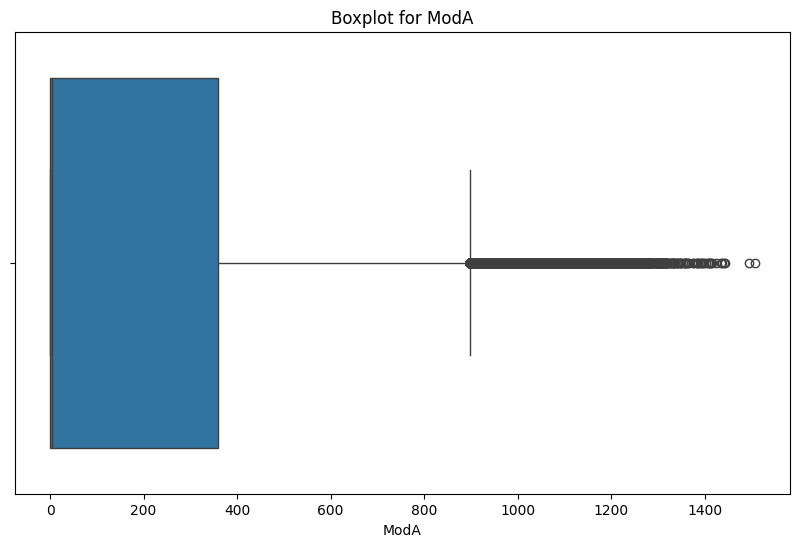


Visualizing Outliers:

Visualizing Outliers:


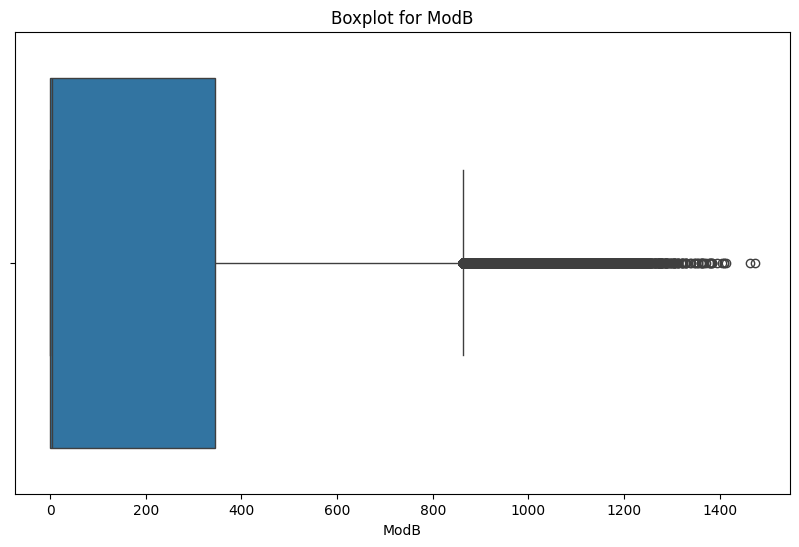


Visualizing Outliers:

Visualizing Outliers:


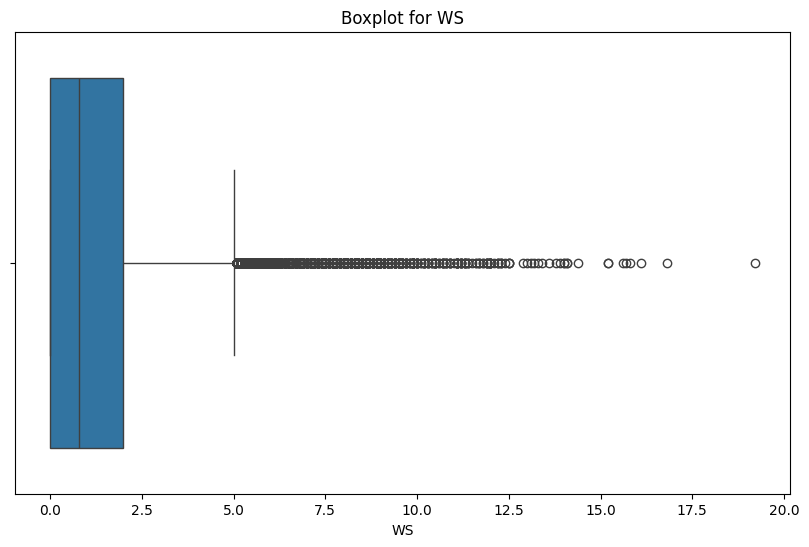


Visualizing Outliers:

Visualizing Outliers:


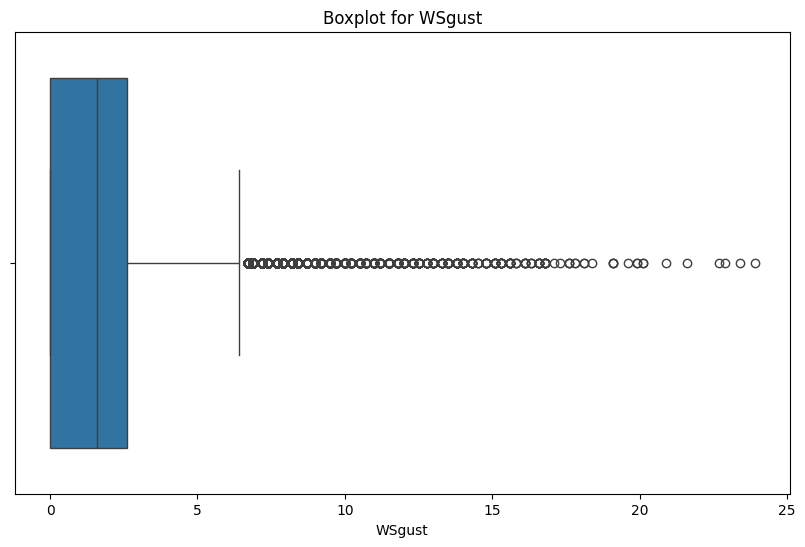


Visualizing Outliers:

Visualizing Outliers:


In [10]:
def plot_outliers(column_name, data):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data)
    plt.title(f'Boxplot for {column_name}')
    plt.show()
    print("\nVisualizing Outliers:")
    print("\nVisualizing Outliers:")
plot_outliers('ModA', df['ModA'])
plot_outliers('ModB', df['ModB'])
plot_outliers('WS', df['WS'])
plot_outliers('WSgust', df['WSgust'])
